<a href="https://colab.research.google.com/github/lakpa-finju/DigitRecognition/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install -q keras
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt 

Load data set from MNIST

In [3]:
digits_mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


let us look at the shape of our data and the way it is represented in the dataset

In [4]:
print(train_images[0])
print("this is label:",train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


lets us look at the one training image and see how it looks. 

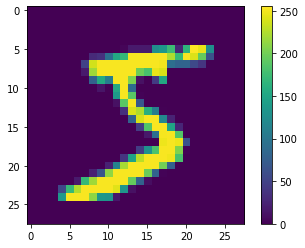

actual value: 5


In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print("actual value:",train_labels[0])

Feature scaling/normalizing the feature value between 0 and 1. 

In [37]:
train_images = train_images/255.0
test_images = test_images /255.0
print(train_images[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

converting them in the dimension of `28*28 = 784` for ease of operation

In [8]:
train_images = train_images.reshape(60000,784)
print(train_images.shape)

(60000, 784)


Let us look at the 100 train images after the feature scaling and their respective train labels.

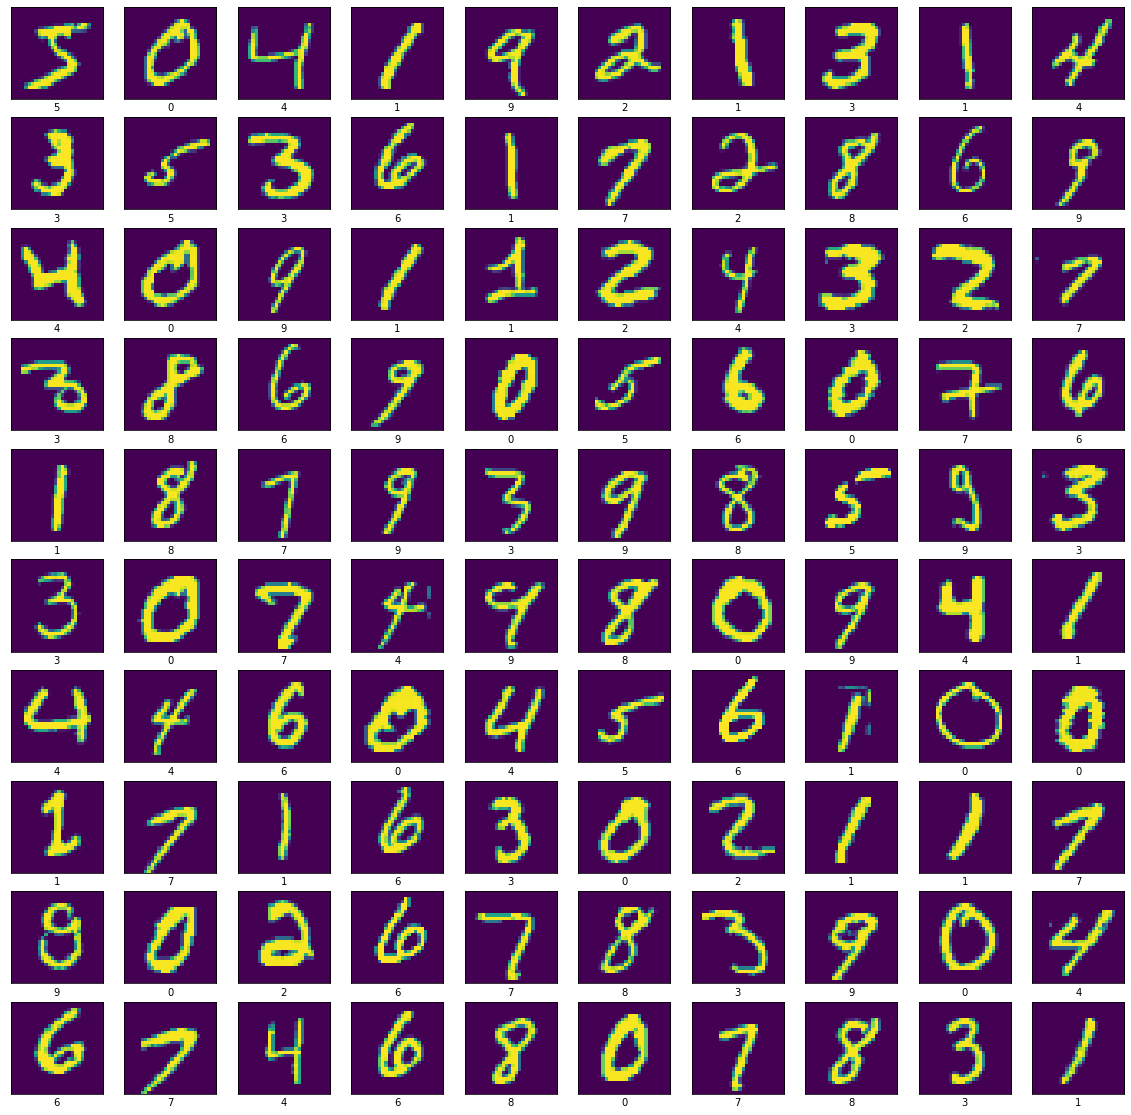

In [24]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i].reshape(28,28))
  plt.grid(False)
  plt.xlabel(train_labels[i])
plt.show()

Implementing the digit recognition model

In [25]:
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='linear')
], name = 'digit_recognition')

In [26]:
model.summary()

Model: "digit_recognition"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


Defining a Loss function that would include the softmax by making `from_logits=True`. We will use `adam` optimizer which stands for adaptive moment estimation. What adam basically does is that it adjusts the learning rate as needed and this will help reduce the cost value very significantly. 

In [27]:
from tensorflow.python import metrics
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['Accuracy'])

In [28]:
history = model.fit(train_images, train_labels, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4085 - Accuracy: 0.8781
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2011 - Accuracy: 0.9403
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1671 - Accuracy: 0.9514
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1466 - Accuracy: 0.9559
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1322 - Accuracy: 0.9594
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1206 - Accuracy: 0.9634
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1109 - Accuracy: 0.9668
Epoch 8/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1049 - Accuracy: 0.9673
Epoch 9/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0986 - Accuracy: 0.9699
Epoch 10/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.092

ploting the history of of the cost function to see if the loss function values is converging. 

Text(0.5, 0, 'num of iteration/epochs')

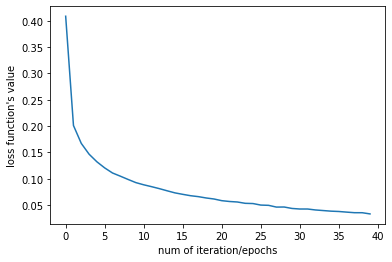

In [36]:
plt.plot(history.history['loss'])
plt.ylabel("loss function's value")
plt.xlabel("num of iteration/epochs")

As we can see above, the loss function value is converging and it can be infered that the loss function value can be further reduced but not significantly as it has started converging. The cost can be reduced either by increasing the number of epochs or by increasing data in the training set. Moreover, Learning rate can be adjusted to get better result. This are one of the many solutions one can apply to reduce the loss function value. This model took me around 4min and 20 seconds to train on 60000 training datas. 

Now lets predict the `test_images` using our newly trained model and see how well it performs. But first let use reshape the image into `28*28=784`.

In [30]:
print(test_images.shape)
test_images = test_images.reshape(10000,784)
print(test_images.shape)

(10000, 28, 28)
(10000, 784)


In [31]:
prediction = model.predict(test_images[0].reshape(1,784))
print(f"Model's output  : {prediction}")
print(f'True test label :{test_labels[0]}')

Model's output  : [[ -7.541936   -9.272047   -2.967658    7.1576266 -10.361905  -11.207115
  -39.577938   14.466549   -1.6690444   6.267234 ]]
True test label :7


Since the model prediction is not the probability, we need to pass the model prediction value to the softmax to get the probability number. Out of 10, the one with the highest probability is the true prediction. 

In [32]:
prediction_probability = tf.nn.softmax(prediction)
print(f'Models output Probability : {prediction_probability}')
print(f'Test label                : {test_labels[0]}')

Models output Probability : [[2.7632932e-10 4.8983390e-11 2.6792284e-08 6.6890655e-04 1.6471376e-11
  7.0739083e-12 3.3757291e-24 9.9905652e-01 9.8172734e-08 2.7458245e-04]]
Test label                : 7


In [33]:
print(f" The digit with the highest Probability is {np.argmax(prediction_probability)}, Hence its the model's prediction.")

 The digit with the highest Probability is 7, Hence its the model's prediction.


In [34]:
model_evaluation = model.evaluate(test_images,test_labels, verbose=2)

313/313 - 1s - loss: 0.1840 - Accuracy: 0.9615 - 661ms/epoch - 2ms/step


Above, we can see the loss value is `0.1840` and the accuracy of the model is `96.15 %`

Lets try to save the model we have trained above.

In [ ]:
!mkdir -p saved_model
model.save('saved_model/digit_recognition.h5')